## Read file into python

In [ ]:
!pip install git+https://github.com/pdftables/python-pdftables-api.git

  Cloning https://github.com/pdftables/python-pdftables-api.git to /tmp/pip-req-build-wf1bik6j
  Running command git clone --filter=blob:none --quiet https://github.com/pdftables/python-pdftables-api.git /tmp/pip-req-build-wf1bik6j
  Resolved https://github.com/pdftables/python-pdftables-api.git to commit 0abf88cc499ed6c001fb641791f84cdc8eafbc58
  Preparing metadata (setup.py) ... done
  Created wheel for pdftables-api: filename=pdftables_api-2.0.0-py3-none-any.whl size=5857 sha256=7405b5d91c726313aeaefe71782b42d8e8ee511a9c3f98612ce2c0ee31f49b6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozjik92t/wheels/18/2b/4f/cc98bfcacce2f948334da6bfa1348dfaa26a0a0491514cdba3
Successfully built pdftables-api


In [ ]:
# Read file from PDF
import pdftables_api

table1 = pdftables_api.Client('lm7x4iv4h9wk')
table1.xlsx('/content/drive/MyDrive/Competitor analysis/HomeXpress investorx_rate_sheet-7.24.2023.pdf', '/content/drive/MyDrive/Competitor analysis/HomeXpress investorx_rate_sheet-7.24.2023.xlsx')
table2 = pdftables_api.Client('lm7x4iv4h9wk')
table1.xlsx('/content/drive/MyDrive/Competitor analysis/BP DSCR Rate Sheet 7.27.2023.pdf', '/content/drive/MyDrive/Competitor analysis/BP DSCR Rate Sheet 7.27.2023.xlsx')

In [ ]:
# Read excel file
from openpyxl import load_workbook
from google.colab import drive
drive.mount('/content/drive')

# load path to excel file
workbook_NP = load_workbook('/content/drive/MyDrive/Competitor analysis/NP Inc Flex Wholesale Rate Sheet 7.20.2023.xlsx', data_only = True)
workbook_ARC = load_workbook('/content/drive/MyDrive/Competitor analysis/ARC Correspondent-NQM-DSCR-NA QM-7.24.2023.xlsx', data_only = True)
workbook_theLender = load_workbook('/content/drive/MyDrive/Competitor analysis/theLender_Wholesale_NONQM-Ratesheet-7.26.2023.xlsx', data_only = True)
workbook_loan_stream = load_workbook('/content/drive/MyDrive/Competitor analysis/Loan Stream NANQ WS Ratesheet 08.14.2023 V1.0.xlsm', data_only = True)
workbook_Newfi = load_workbook('/content/drive/MyDrive/Competitor analysis/newfiWholesale.xlsx', data_only = True)

# select your excel sheet
sheet_NP = workbook_NP['Flex Select Prime DSCR_MU']
sheet_ARC = workbook_ARC['Corr - Del Non-Agency']
sheet_theLender = workbook_theLender['NONI']
sheet_loan_stream = workbook_loan_stream['NanQ ONE Program']
sheet_Newfi = workbook_Newfi['SEQUOIA DSCR']

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/reader/drawings.py:29: UserWarning: DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.
  warn("DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.")


In [ ]:
workbook_HomeXpress = load_workbook('/content/drive/MyDrive/Competitor analysis/HomeXpress investorx_rate_sheet-7.24.2023.xlsx', data_only = True)
workbook_Acra = load_workbook('/content/drive/MyDrive/Competitor analysis/BP DSCR Rate Sheet 7.27.2023.xlsx', data_only = True)

sheet_HomeXpress = workbook_HomeXpress['Sheet1']
sheet_Acra = workbook_Acra['Sheet1']

## Extract different tables of criteria

In [ ]:
from string import ascii_uppercase
from itertools import pairwise
from openpyxl import load_workbook
import pandas as pd

In [ ]:
## Extracting different tables
def get_next_code(code):
    '''
    returns next column letter given existing one
    input: 'AA', output: 'AB'
    input: 'AB', output: 'AC'
    '''
    letter_map = {a:b for a,b in pairwise(ascii_uppercase)}
    code = list(code)
    i = -1
    while True:
        if code[i] == 'Z':
            code[i] = 'A'
            i -= 1
            if abs(i) > len(code):
                return 'A' + ''.join(code)
        else:
            code[i] = letter_map[code[i]]
            return ''.join(code)

def snap_table(sheet, topleft, num_columns, num_rows):
    '''
    input:
        sheet: the Excel sheet we want
        topleft: coordinates of topleft coordinate eg. 'B2'
        num_columns: number of columns in table
        num_rows: number of rows in table
    output:
        pandas dataframe
    '''
    try:
        import re
        col = re.findall('[a-zA-Z]+', topleft)[0]
        num = int(re.findall('[0-9]+', topleft)[0])

        columns = [col]
        for i in range(num_columns-1):
            columns.append(get_next_code(columns[-1]))
        numbers = [n for n in range(num, num+num_rows)]

        data = []
        for n in numbers:
            row = []
            for c in columns:
                code = c + str(n)
                row.append(sheet[code].value)
            data.append(row)
        return pd.DataFrame(data[1:], columns=data[0])
    except Exception as e:
        return pd.DataFrame()

In [ ]:
# Coupon table
coupon_table_NP = snap_table(sheet_NP, 'B6', 3, 38).rename(columns={'Rate':'Note Rate','5/6 ARM':'5 YR ARM', 'FIX30/FIX15':'15 YR FIX'})
coupon_table_NP['30 YR FIX'] = coupon_table_NP.loc[:, '15 YR FIX']

coupon_table_ARC = snap_table(sheet_ARC, 'M64', 2, 25).rename(columns={'30 Day':'5 YR ARM'})
coupon_table_ARC['7 YR ARM'] = coupon_table_ARC.loc[:,'5 YR ARM']
coupon_table_ARC['15 YR FIX'] = coupon_table_ARC.loc[:,'5 YR ARM']
coupon_table_ARC['30 YR FIX'] = coupon_table_ARC.loc[:,'5 YR ARM']

coupon_table_theLender = snap_table(sheet_theLender, 'A8', 4, 29).rename(columns={'7/6 ARM':'7 YR ARM', '10/ 6 ARM':'10 YR ARM', '30 Yr Fx':'30 YR FIX'})

coupon_table_loan_stream = snap_table(sheet_loan_stream, 'A10', 4, 44)[6:].drop(columns = ['Full Doc', 'Alt Doc']).rename(columns={'Coupon':'Note Rate', 'DSCR':'5 YR ARM'}).reset_index().drop(columns=['index'])
coupon_table_loan_stream['7 YR ARM'] = coupon_table_loan_stream.loc[:,'5 YR ARM']
coupon_table_loan_stream['15 YR FIX'] = coupon_table_loan_stream.loc[:,'5 YR ARM']
coupon_table_loan_stream['30 YR FIX'] = coupon_table_loan_stream.loc[:,'5 YR ARM']

coupon_table_Newfi = snap_table(sheet_Newfi, 'C54', 2, 21).rename(columns={'Rate':'Note Rate', '30 Day':'30 YR FIX'})
coupon_table_Newfi['30 YR FIX'] = [100*(1-float(coupon_table_Newfi['30 YR FIX'][i])/100) for i in range(len(coupon_table_Newfi['30 YR FIX']))]
coupon_table_Newfi['Note Rate'] = [float(coupon_table_Newfi['Note Rate'][i]) for i in range(len(coupon_table_Newfi['Note Rate']))]

In [ ]:
# FICO
FICO_NP = snap_table(sheet_NP, 'H6', 9, 10).rename(columns={None:'FICO/LTV'})
FICO_NP = FICO_NP.loc[:, ~FICO_NP.columns.duplicated()]
FICO_NP.columns = ['FICO/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
FICO_NP['FICO/LTV'][3] = '700 - 719'
FICO_NP['FICO/LTV'][8] = '600 - 619'
FICO_NP = FICO_NP.replace(to_replace='N/A', value=0, regex=True)

FICO_ARC = snap_table(sheet_ARC, 'C405', 9, 8).rename(columns={None:'FICO'})
FICO_ARC.columns = ['FICO/LTV', 'FICO/LTV', 'FICO/LTV', '55%', '60%', '65%', '70%', '75%', '80%']
FICO_ARC['<=50%'] = FICO_ARC.loc[:,'55%']
FICO_ARC = FICO_ARC.loc[:, ~FICO_ARC.columns.duplicated()]
new_row = {'FICO/LTV':'620 - 639', '55%':0, '60%':0, '65%':0, '70%':0, '75%':0, '80%':0, '<=50%':0}
FICO_ARC.loc[7] = new_row
FICO_ARC = FICO_ARC.replace(to_replace='N/A', value=0, regex=True)

FICO_theLender = snap_table(sheet_theLender, 'B41', 8, 9)
FICO_theLender.columns = ['FICO/LTV', '<=50%', '55%','60%', '65%', '70%', '75%', '80%']
FICO_theLender['FICO/LTV'] = ['760+', '740 - 759', '720 - 739', '700 - 719', '680 - 699', '660 - 679', '640 - 659', '620 - 639']
FICO_theLender = FICO_theLender.replace(to_replace='NA', value=0, regex=True)

FICO_loan_stream = snap_table(sheet_loan_stream,'G10', 10, 11).rename(columns = {None:'FICO/LTV'})
FICO_loan_stream = FICO_loan_stream.loc[:, ~FICO_loan_stream.columns.duplicated()]
FICO_loan_stream.columns = ['FICO/LTV', '<=50%', '60%', '65%', '70%', '75%', '80%', '85%', '90%']
FICO_loan_stream['FICO/LTV'] = ['780+', '760+', '740 - 759', '720 - 739', '700 - 719', '680 - 699', '660 - 679', '640 - 659', '620 - 639', '600 - 619']
FICO_loan_stream = FICO_loan_stream.replace(to_replace='#N/A', value=0, regex=True)

FICO_Newfi = snap_table(sheet_Newfi, 'G134', 8, 8)
FICO_Newfi.columns = ['FICO/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
FICO_Newfi['FICO/LTV'] = ['760+', '740 - 759', '720 - 739', '700 - 719', '680 - 699', '660 - 679', '640 - 659']

In [ ]:
# DSCR
DSCR_NP = snap_table(sheet_NP, 'H16', 9, 5).drop([0]).rename(columns={None:'DSCR/LTV'})
DSCR_NP = DSCR_NP.loc[:, ~DSCR_NP.columns.duplicated()]
DSCR_NP.columns = ['DSCR/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
DSCR_NP['DSCR/LTV'] = [0, 0.75, 1.24]
DSCR_NP.loc['>1.00'] = DSCR_NP.loc[3,:]
DSCR_NP['DSCR/LTV'][3] = 1.00
DSCR_NP = DSCR_NP.replace(to_replace='N/A', value=0, regex=True).reset_index().drop(columns=['index'])

DSCR_ARC = snap_table(sheet_ARC, 'C432', 9, 5).rename(columns={None:'Doc Type'})
DSCR_ARC.columns = ['DSCR/LTV', 'DSCR/LTV', 'DSCR/LTV', '55%', '60%', '65%', '70%', '75%', '80%']
DSCR_ARC['<=50%'] = DSCR_ARC.loc[:, '55%']
DSCR_ARC = DSCR_ARC.loc[:, ~DSCR_ARC.columns.duplicated()]
DSCR_ARC = DSCR_ARC.drop([0, 1]).reset_index().drop(columns=['index'])
DSCR_ARC['DSCR/LTV'] = [1.15, 0]
new_row = {'DSCR/LTV': 1.00, '55%': 0.0, '60%':0.0, '65%':0.0, '70%':0.0, '75%':0.0, '80%':0.0, '<=50%':0.0}
DSCR_ARC.loc[2] = new_row
DSCR_ARC = DSCR_ARC.replace(to_replace='N/A', value=0, regex=True)

DSCR_theLender = snap_table(sheet_theLender, 'B41', 8, 14)[9:].reset_index().drop(columns=['index']).rename(columns={'Choose a Selection':'DSCR/LTV'})
DSCR_theLender.columns = ['DSCR/LTV', '<=50%', '55%','60%', '65%', '70%', '75%', '80%']
DSCR_theLender['DSCR/LTV'] = [1.25, 1.00, 0.75, 0]
DSCR_theLender = DSCR_theLender.replace(to_replace='NA', value=0, regex=True)

DSCR_loan_stream = snap_table(sheet_loan_stream, 'K30', 3, 4).rename(columns={'Select - DSCR': 'DSCR/LTV', None:'DSCR/LTV', 1:'<=50%'})
DSCR_loan_stream = DSCR_loan_stream.loc[:, ~DSCR_loan_stream.columns.duplicated()]
DSCR_loan_stream['55%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['60%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['65%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['70%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['75%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['80%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['85%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['90%'] = DSCR_loan_stream.loc[:, '<=50%']
DSCR_loan_stream['DSCR/LTV'] = [1.20, 1.00, 0]
DSCR_loan_stream = DSCR_loan_stream.replace(to_replace='#N/A', value=0, regex=True)

DSCR_Newfi = snap_table(sheet_Newfi, 'G134', 8, 9)[7:].reset_index().drop(columns=['index'])
DSCR_Newfi['FICO'][0] = '>=0.8 & <1.0'
DSCR_Newfi.columns = ['DSCR/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']

<ipython-input-7-2ea41bc87af6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSCR_NP['DSCR/LTV'][3] = 1.00
<ipython-input-7-2ea41bc87af6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSCR_Newfi['FICO'][0] = '>=0.8 & <1.0'


In [ ]:
# Loan Balance
LB_NP = snap_table(sheet_NP, 'H25', 9, 9).rename(columns={None:'Interest-Only'})
LB_NP.columns = ['Loan Balance/LTV', 'Loan Balance/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
LB_NP = LB_NP.loc[:, ~LB_NP.columns.duplicated()]
LB_NP['Loan Balance/LTV'] = [0, 100000, 150000, 1000000, 1500000, 2000000, 2500000, 3000000]
LB_NP = LB_NP.replace(to_replace='N/A', value=0, regex=True)

LB_ARC = snap_table(sheet_ARC, 'C424', 9, 7).rename(columns={None:'Loan Amounts'})
LB_ARC.columns = ['Loan Balance/LTV', 'Loan Balance/LTV', 'Loan Balance/LTV', '55%', '60%', '65%', '70%', '75%', '80%']
LB_ARC['Loan Balance/LTV'] = [0, 225000, 726200, 1000000, 1500000, 2000000]
LB_ARC.loc["2,500,001-3,000,000"] = LB_ARC.loc[5,:]
LB_ARC.loc[">3,000,000"] = LB_ARC.loc[5,:]
LB_ARC = LB_ARC.loc[:, ~LB_ARC.columns.duplicated()].reset_index().drop(columns=['index'])
LB_ARC['<=50%'] = LB_ARC.loc[:, '55%']
LB_ARC['Loan Balance/LTV'][6] = 2500000
LB_ARC['Loan Balance/LTV'][7] = 3000000
LB_ARC = LB_ARC.replace(to_replace='N/A', value=0, regex=True)

LB_theLender = snap_table(sheet_theLender, 'B57', 8, 13)[3:].reset_index().drop(columns=['index'])
LB_theLender.columns = ['Loan Balance/LTV', '<=50%', '55%','60%', '65%', '70%', '75%', '80%']
LB_theLender['Loan Balance/LTV'] = [0, 150000, 250000, 500000, 1000000, 2500000, 2000000, 2500000, 3000000]
LB_theLender = LB_theLender.replace(to_replace='NA', value=0, regex=True)

LB_loan_stream = snap_table(sheet_loan_stream, 'G48', 3, 9).rename(columns={'Condotel':'Loan Balance/LTV',None:'Loan Balance/LTV', -1.000:'<=50%'})
LB_loan_stream = LB_loan_stream.loc[:, ~LB_loan_stream.columns.duplicated()]
LB_loan_stream['Loan Balance/LTV'] = [0, 150000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000]
LB_loan_stream['55%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['60%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['65%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['70%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['75%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['80%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['85%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream['90%'] = LB_loan_stream.loc[:, '<=50%']
LB_loan_stream = LB_loan_stream.replace(to_replace='#N/A', value=0, regex=True)

LB_Newfi = snap_table(sheet_Newfi, 'E156', 10, 5).rename(columns={None:'Loan Amounts'})
LB_Newfi = LB_Newfi.loc[:, ~LB_Newfi.columns.duplicated()]
LB_Newfi.columns = ['Loan Balance/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
LB_Newfi['Loan Balance/LTV'] = [0, 1000000, 1500000, 2000000]
new_row = {'Loan Balance/LTV': 250000, '<=50%':0.0, '55%': 0.0, '60%':0.0, '65%':0.0, '70%':0.0, '75%':0.0, '80%':0.0}
LB_Newfi.loc[4] = new_row

<ipython-input-8-b27c38ab1162>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LB_ARC['Loan Balance/LTV'][6] = 2500000
<ipython-input-8-b27c38ab1162>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LB_ARC['Loan Balance/LTV'][7] = 3000000


In [ ]:
# Other criteria
OC_NP = snap_table(sheet_NP, 'H24', 9, 27).rename(columns={None:'Other criteria/LTV'}).drop(index=[1,2,3,4,5,6,7,8,9]).reset_index().drop(columns=['index'])
OC_NP.columns = ['Other criteria/LTV', 'Other criteria/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
OC_NP = OC_NP.loc[:, ~OC_NP.columns.duplicated()]
OC_NP['Other criteria/LTV'][0] = 'Interest Only'
OC_NP['Other criteria/LTV'][1] = 'Cash-Out Refinance'
OC_NP = OC_NP.replace(to_replace='N/A', value=0, regex=True)

OC_ARC = snap_table(sheet_ARC, 'C438', 9, 12).drop([1,2])
OC_ARC = OC_ARC.drop([8,9]).reset_index().drop(columns=['index']).rename(columns={None:'Purpose'})
OC_ARC = OC_ARC.loc[:, ~OC_ARC.columns.duplicated()]
OC_ARC.columns = ['Other criteria/LTV', '55%', '60%', '65%', '70%', '75%', '80%']
OC_ARC['<=50%'] = OC_ARC.loc[:, '55%']
OC_ARC = OC_ARC.replace(to_replace='N/A', value=0, regex=True)

OC_theLender= snap_table(sheet_theLender, 'B57', 8, 26)[12:].reset_index().drop(columns=['index'])
OC_theLender.columns = ['Other criteria/LTV', '<=50%', '55%','60%', '65%', '70%', '75%', '80%']
OC_theLender['Other criteria/LTV'] = ['Cash-Out Refinance & FICO>=700','Cash-Out Refinance & FICO<700', 'Condo', 'Condotel/Assisted Living', 'Non Warrantable Condo', '2-4 Unit', '40 Year', 'Interest Only', '48 Months PPP', '36 Months PPP', '24 Months PPP', '12 Months PPP', 'No Penalty']
OC_theLender = OC_theLender.replace(to_replace='NA', value=0, regex=True)

OC_loan_stream = snap_table(sheet_loan_stream, 'G26', 3, 36).drop(index=[22,23,24,25,26,27,28,29,30,31]).reset_index().drop(columns=['index'])
OC_loan_stream.columns = ['Other criteria/LTV', 'Other criteria/LTV', '<=50%']
OC_loan_stream = OC_loan_stream.loc[:, ~OC_loan_stream.columns.duplicated()]
OC_loan_stream['Other criteria/LTV'][7] = 'Cash-Out Refinance & LTV>70%'
OC_loan_stream['Other criteria/LTV'][8] = 'Cash-Out Refinance & LTV<=70%'
OC_loan_stream['Other criteria/LTV'][20] = 'Condo'
OC_loan_stream['55%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['60%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['65%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['70%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['75%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['80%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['85%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream['90%'] = OC_loan_stream.loc[:, '<=50%']
OC_loan_stream = OC_loan_stream.replace(to_replace='#N/A', value=0, regex=True)

OC_Newfi = snap_table(sheet_Newfi, 'E144', 10, 11).rename(columns={None:'Other Adjustments'})
OC_Newfi = OC_Newfi.loc[:, ~OC_Newfi.columns.duplicated()]
OC_Newfi.columns = ['Other criteria/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
PPP_Newfi = snap_table(sheet_Newfi, 'E162', 10, 7).rename(columns={None:'Prepayment Penalty'})
PPP_Newfi = PPP_Newfi.loc[:, ~PPP_Newfi.columns.duplicated()]
PPP_Newfi.columns = ['Other criteria/LTV', '<=50%', '55%', '60%', '65%', '70%', '75%', '80%']
PPP_Newfi['PPP/LTV'] = ['60 Months PPP', '48 Months PPP', '36 Months PPP', '24 Months PPP', '12 Months PPP', 'No Penalty']

<ipython-input-9-06fc27ea0807>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_NP['Other criteria/LTV'][1] = 'Cash-Out Refinance'
<ipython-input-9-06fc27ea0807>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_loan_stream['Other criteria/LTV'][8] = 'Cash-Out Refinance & LTV<=70%'
<ipython-input-9-06fc27ea0807>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_loan_stream['Other criteria/LTV'][20] = 'Condo'


In [ ]:
# Special extraction from pdf file
DSCR_HomeXpress = snap_table(sheet_HomeXpress, 'A13', 3, 4).drop(columns = ['Max LTV'])
DSCR_HomeXpress['DSCR/LTV'] = [1.25, 1.00, 0.75]
FICO_HomeXpress = snap_table(sheet_HomeXpress, 'A22', 8, 9).drop([0]).reset_index().drop(columns=['index'])
FICO_HomeXpress.columns = ['FICO/LTV', '<=50%', '55%','60%', '65%', '70%', '75%', '80%']
FICO_HomeXpress['FICO/LTV'] = [760, 740, 720, 700, 680, 660, 640]
PPP_HomeXpress = snap_table(sheet_HomeXpress, 'A64', 2, 7)
PPP_HomeXpress['PPP'] = ['60 Months PPP','48 Months PPP', '36 Months PPP', '24 Months PPP', '12 Months PPP', 'No Penalty']
OC_HomeXpress = snap_table(sheet_HomeXpress, 'A35', 2, 14)

FICO_Acra = snap_table(sheet_Acra, 'A4', 8, 9).drop(columns = ['( Credit Tier )'])
FICO_Acra.columns = ['FICO/LTV', '<=50%','60%', '65%', '70%', '75%', '80%']
FICO_Acra['55%'] = FICO_Acra.loc[:, '60%']
PPP_Acra = snap_table(sheet_Acra, 'A43', 2, 31)[24:].reset_index().drop(columns=['index'])
PPP_Acra.columns = ['PPP', 'Rate Add']
PPP_Acra['PPP'] = ['60 Months PPP (5x5)','60 Months PPP (Step)', '36 Months PPP(3x5)', '36 Months PPP', '24 Months PPP', '12 Months PPP']
OC_Acra = snap_table(sheet_Acra, 'A43', 2, 25)
OC_Acra.columns = ['Other criteria', 'Rate Add']

## Standard from Jia Finance

In [ ]:
## coupon table
jia_LLPA = load_workbook('/content/drive/MyDrive/Jia Wholesale Rate Sheet.xlsx', data_only = True)['Jia Retail LLPA Sheet-DSCR']
coupon_table_jia = snap_table(jia_LLPA, 'B7', 6, 30).rename(columns = {'Rate':'Note Rate'})

In [ ]:
## FICO
FICO_jia = snap_table(jia_LLPA, 'C38', 10, 9).rename(columns = {None:'FICO/LTV'})
FICO_jia = FICO_jia.loc[:, ~FICO_jia.columns.duplicated()]
FICO_jia.columns = ['FICO/LTV','<=50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%']
FICO_jia = FICO_jia.replace(to_replace='n/a', value=0, regex=True)

In [ ]:
## DSCR
DSCR_jia = snap_table(jia_LLPA, 'C48', 10, 7).rename(columns = {None:'DSCR/LTV'})
DSCR_jia = DSCR_jia.loc[:, ~DSCR_jia.columns.duplicated()]
DSCR_jia.columns = ['DSCR/LTV','<=50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%']
DSCR_jia['DSCR/LTV'] = [2.5, 1.49, 1.09, 1, 0.75, 0]
DSCR_jia = DSCR_jia.replace(to_replace='n/a', value=0, regex=True)

In [ ]:
## Loan Balance
LB_jia = snap_table(jia_LLPA, 'C48', 10, 15).rename(columns = {None:'Loan Balance/LTV'})[9:].reset_index().drop(columns=['index'])
LB_jia = LB_jia.loc[:, ~LB_jia.columns.duplicated()]
LB_jia.columns = ['Loan Balance/LTV','<=50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%']
LB_jia['Loan Balance/LTV'] = [100000, 150000, 250000, 500000, 1000000]
LB_jia = LB_jia.replace(to_replace='n/a', value=0, regex=True)

In [ ]:
## Other criteria
OC_jia = snap_table(jia_LLPA, 'C48', 10, 29).rename(columns = {None:'Other criteria/LTV'})[15:].reset_index().drop(columns=['index'])
OC_jia = OC_jia.loc[:, ~OC_jia.columns.duplicated()]
OC_jia['Other criteria/LTV'][0] = 'Cash-Out Refinance'
OC_jia['Other criteria/LTV'][7:12] = ['60 Months PPP', '48 Months PPP', '36 Months PPP', '24 Months PPP', '12 Months PPP']
OC_jia.columns = ['Other criteria/LTV','<=50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%']
new_row = {'Other criteria/LTV': 'Purchase', '<=50%': 0,	'55%': 0,	'60%': 0,	'65%': 0,	'70%': 0,	'75%': 0,	'80%': 0,	'85%': 0}
OC_jia = OC_jia.append(pd.DataFrame([new_row],index=['13'],columns=OC_jia.columns))
OC_jia = OC_jia.replace(to_replace='n/a', value=0, regex=True)

<ipython-input-15-8f17b86e7ff4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_jia['Other criteria/LTV'][7:12] = ['60 Months PPP', '48 Months PPP', '36 Months PPP', '24 Months PPP', '12 Months PPP']
<ipython-input-15-8f17b86e7ff4>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  OC_jia = OC_jia.append(pd.DataFrame([new_row],index=['13'],columns=OC_jia.columns))


## The process of getting final rate

Excel file

In [ ]:
# LLPA Adjustments

def base_price(coupon_table, loan_type):
  for i in range(len(coupon_table[loan_type])):
    if(coupon_table[loan_type][i] >= 100):
      bp = coupon_table[loan_type][i]
      break
  return bp

def FICO_LLPA(FICO_table, LTV, FICO):
  row_num = FICO_table[FICO_table['FICO/LTV'] == FICO].index[0]
  LLPA = FICO_table[LTV][row_num]
  return LLPA

def DSCR_LLPA(DSCR_table, LTV, DSCR):
  row_num = 0
  LLPA = 0
  for i in DSCR_table['DSCR/LTV']:
    if(DSCR == i):
      row_num = DSCR_table[DSCR_table['DSCR/LTV'] == i].index[0]
      LLPA = DSCR_table[LTV][row_num]
      break
  return LLPA


def LB_LLPA(LB_table, LTV, LB):
  row_num = 0
  LLPA = 0
  for i in range(len(LB_table['Loan Balance/LTV'])):
    if(LB >= LB_table['Loan Balance/LTV'][i] and LB < LB_table['Loan Balance/LTV'][i+1]):
      row_num = LB_table[LB_table['Loan Balance/LTV'] == LB_table['Loan Balance/LTV'][i]].index[0]
      LLPA = LB_table[LTV][row_num]
      break
  return LLPA

def OC_LLPA(OC_table, LTV, OC):
  LLPA = 0
  for i in OC_table['Other criteria/LTV']:
    if(OC == i):
      row_num = OC_table[OC_table['Other criteria/LTV'] == i].index[0]
      LLPA = OC_table[LTV][row_num]
      break
  return LLPA

In [ ]:
def final_LLPA(FICO, DSCR, LB, Property, Purpose, Amoti, PPP):
  criteria = [FICO, DSCR, LB, Property, Purpose, Amoti, PPP]
  fp = sum(criteria)
  return fp

In [ ]:
## Get final rate - accurate

def get_final_rate(coupon_table, standard, Loan_type, IO_multiplier):
  fp = 100-standard
  final_rate = '>' + str(max(coupon_table['Note Rate']))
  for i in coupon_table[Loan_type]:
    if(fp == i):
      final_rate = coupon_table['Note Rate'][coupon_table[coupon_table[Loan_type] == i].index[0]]
      break
    elif(fp > i and fp < i+1):
      final_rate = coupon_table['Note Rate'][coupon_table[coupon_table[Loan_type] == i].index[0]] + (fp - i)/IO_multiplier
      break
  if fp < coupon_table[Loan_type][0]:
    final_rate = coupon_table['Note Rate'][coupon_table[coupon_table[Loan_type] == coupon_table[Loan_type][0]].index[0]] - (coupon_table[Loan_type][0] - fp)/IO_multiplier
  return final_rate

PDF file

In [ ]:
def FICO_rate_adj(FICO_table, LTV, FICO):
  for i in FICO_table['FICO/LTV']:
    if(FICO >= i):
      row_num = FICO_table[FICO_table['FICO/LTV'] == i].index[0]
      rate_adj = FICO_table[LTV][row_num]
      break
  return rate_adj

def DSCR_rate_adj(DSCR_table, LTV, DSCR):
  for i in DSCR_table['DSCR/LTV']:
    if(DSCR == i):
      row_num = DSCR_table[DSCR_table['DSCR/LTV'] == i].index[0]
      rate_adj = DSCR_table['Rate Add'][row_num]
      break
  return rate_adj

def PPP_rate_adj(PPP_table, PPP):
  row_num = PPP_table[PPP_table['PPP'] == PPP].index[0]
  rate_adj = PPP_table['Rate Add'][row_num]
  return rate_adj

def OC_rate_adj(OC_table, OC):
  rate_adj = 0
  for i in OC_table['Other criteria']:
    if(OC == i):
      row_num = OC_table[OC_table['Other criteria'] == i].index[0]
      rate_adj = OC_table['Rate Add'][row_num]
      break
  return rate_adj

def final_rate_adj(FICO, DSCR, Property_type, Loan_purpose, IO, PPP):
  criteria = [FICO, DSCR, Property_type, Loan_purpose, IO, PPP]
  fr = sum(criteria)
  return fr

In [ ]:
## HomeXpress
def get_final_rate_HomeXpress(FICO, LTV, DSCR, Property_type, Loan_purpose, IO, PPP):
  final_rate = 0
  if(Loan_purpose == 'Purchase'):
    final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))
    print({'HomeXpress rate adj': [FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP)]})

  if(Loan_purpose == 'Cash-Out Refinance' and IO == 'N'):
    if(LTV in ['70%', '75%', '80%']):
      final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV≥70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))
      print({'HomeXpress rate adj': [FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV≥70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP)]})
    elif(LTV not in ['70%', '75%', '80%']):
      final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV<70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))
      print({'HomeXpress rate adj': [FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV<70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP)]})

  elif(IO == 'Y'):
    if(LTV in ['75%', '80%'] or DSCR < 1.0):
      final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( ≥75 % LTV OR DSCR < 1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP))
      print({'HomeXpress rate adj': [FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( ≥75 % LTV OR DSCR < 1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP)]})
    elif(LTV not in ['75%', '80%'] and DSCR >= 1.0):
      final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( < 75 % LTV & DSCR ≥1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP))
      print({'HomeXpress rate adj': [FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( < 75 % LTV & DSCR ≥1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP)]})

  return final_rate

## Acra
def get_final_rate_Acra(FICO, LTV, DSCR, Property_type, Loan_purpose, IO, PPP):
  final_rate = 0
  if(IO == 'N'):
    final_rate = final_rate_adj(FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                              OC_rate_adj(OC_Acra, IO), PPP_rate_adj(PPP_Acra, PPP))
    print({'Acra rate adj': [FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                                OC_rate_adj(OC_Acra, IO), PPP_rate_adj(PPP_Acra, PPP)]})
  elif(IO == 'Y'):
    final_rate = final_rate_adj(FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                              OC_rate_adj(OC_Acra, 'Interest Only (30 - Term, 30 YR FIX )'), PPP_rate_adj(PPP_Acra, PPP))
    print({'Acra rate adj': [FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                                OC_rate_adj(OC_Acra, 'Interest Only (30 - Term, 30 YR FIX )'), PPP_rate_adj(PPP_Acra, PPP)]})
  return final_rate

## Scenario analysis process


Excel file

In [ ]:
# Price comparison

def comparison(Loan_type, FICO, LTV, DSCR, Loan_amount, Property_type, Loan_purpose, IO, PPP):

  ## Step 1: Set standard for jia
  standard = 0

  if(IO == 'Y'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               OC_LLPA(OC_jia, LTV, 'Interest Only'), OC_LLPA(OC_jia, LTV, PPP))

    print({'Jia LLPA': {'FICO': FICO_LLPA(FICO_jia, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_jia, LTV, DSCR), 'LB': LB_LLPA(LB_jia, LTV, Loan_amount),
         'PT': OC_LLPA(OC_jia, LTV, Property_type), 'LP': OC_LLPA(OC_jia, LTV, Loan_purpose), 'IO': OC_LLPA(OC_jia, LTV, 'Interest Only'), 'PPP': OC_LLPA(OC_jia, LTV, PPP)}})

  elif(IO == 'N'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               0, OC_LLPA(OC_jia, LTV, PPP))

    print({'Jia LLPA':{'FICO': FICO_LLPA(FICO_jia, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_jia, LTV, DSCR), 'LB': LB_LLPA(LB_jia, LTV, Loan_amount),
         'PT': OC_LLPA(OC_jia, LTV, Property_type), 'LP': OC_LLPA(OC_jia, LTV, Loan_purpose), 'IO': 0, 'PPP': OC_LLPA(OC_jia, LTV, PPP)}})

  jia_final_rate = get_final_rate(coupon_table_jia, standard, Loan_type, 3)


  ## Step 2: Provide each LLPA

  ## NP
  NP_final_LLPA = 0
  if(IO == 'Y'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose),
                               OC_LLPA(OC_NP, LTV, 'Interest Only'), 0)

    print({'NP LLPA': {'FICO': FICO_LLPA(FICO_NP, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_NP, LTV, DSCR), 'LB': LB_LLPA(LB_NP, LTV, Loan_amount),
         'PT': OC_LLPA(OC_NP, LTV, Property_type), 'LP': OC_LLPA(OC_NP, LTV, Loan_purpose), 'IO': OC_LLPA(OC_NP, LTV, 'Interest Only'), 'PPP': 0}})

  elif(IO == 'N'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose), 0, 0)

    print({'NP LLPA': {'FICO': FICO_LLPA(FICO_NP, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_NP, LTV, DSCR), 'LB': LB_LLPA(LB_NP, LTV, Loan_amount),
         'PT': OC_LLPA(OC_NP, LTV, Property_type), 'LP': OC_LLPA(OC_NP, LTV, Loan_purpose), 'IO': 0, 'PPP': 0}})

  ## ARC
  ARC_final_LLPA = 0
  if(IO == 'Y'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0,
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose),
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)

      print({'ARC LLPA': {'FICO': FICO_LLPA(FICO_ARC, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_ARC, LTV, DSCR), 'LB': LB_LLPA(LB_ARC, LTV, Loan_amount),
         'PT': OC_LLPA(OC_ARC, LTV, Property_type), 'LP': OC_LLPA(OC_ARC, LTV, Loan_purpose), 'IO': OC_LLPA(OC_ARC, LTV, 'Interest Only'), 'PPP': 0}})

  elif(IO == 'N'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0, 0, 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose), 0, 0)

      print({'ARC LLPA': {'FICO': FICO_LLPA(FICO_ARC, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_ARC, LTV, DSCR), 'LB': LB_LLPA(LB_ARC, LTV, Loan_amount),
         'PT': OC_LLPA(OC_ARC, LTV, Property_type), 'LP': OC_LLPA(OC_ARC, LTV, Loan_purpose), 'IO': 0, 'PPP': 0}})

  ## theLender
  theLender_final_LLPA = 0
  if(IO == 'Y'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

        print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), 'IO': OC_LLPA(OC_theLender, LTV, 'Interest Only'), 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})
      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

        print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), 'IO': OC_LLPA(OC_theLender, LTV, 'Interest Only'), 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})

    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

      print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': 0, 'IO': OC_LLPA(OC_theLender, LTV, 'Interest Only'), 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})

  elif(IO == 'N'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), 0, OC_LLPA(OC_theLender, LTV, PPP))

        print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), 'IO': 0, 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})
      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), 0, OC_LLPA(OC_theLender, LTV, PPP))

        print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), 'IO': 0, 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})
    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, 0, OC_LLPA(OC_theLender, LTV, PPP))

      print({'theLender LLPA': {'FICO': FICO_LLPA(FICO_theLender, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_theLender, LTV, DSCR), 'LB': LB_LLPA(LB_theLender, LTV, Loan_amount),
         'PT': OC_LLPA(OC_theLender, LTV, Property_type), 'LP': 0, 'IO': 0, 'PPP': OC_LLPA(OC_theLender, LTV, PPP)}})

  ## Loan Stream
  loan_stream_final_LLPA = 0
  if(Loan_purpose == 'Purchase'):
    loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), 0, 0, OC_LLPA(OC_loan_stream, LTV, PPP))

    print({'Loan Stream LLPA': {'FICO': FICO_LLPA(FICO_loan_stream, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_loan_stream, LTV, DSCR), 'LB': LB_LLPA(LB_loan_stream, LTV, Loan_amount),
         'PT': OC_LLPA(OC_loan_stream, LTV, Property_type), 'LP': 0, 'IO': 0, 'PPP': OC_LLPA(OC_loan_stream, LTV, PPP)}})

  if(Loan_purpose == 'Cash-Out Refinance'):
    if(LTV == ['70%', '75%', '80%', '85%', '90%']):
      loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV>70%'),
                               0, OC_LLPA(OC_loan_stream, LTV, PPP))

      print({'Loan Stream LLPA': {'FICO': FICO_LLPA(FICO_loan_stream, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_loan_stream, LTV, DSCR), 'LB': LB_LLPA(LB_loan_stream, LTV, Loan_amount),
         'PT': OC_LLPA(OC_loan_stream, LTV, Property_type), 'LP': OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV>70%'), 'IO': 0, 'PPP': OC_LLPA(OC_loan_stream, LTV, PPP)}})
    else:
      loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV<=70%'),
                               0, OC_LLPA(OC_loan_stream, LTV, PPP))

      print({'Loan Stream LLPA': {'FICO': FICO_LLPA(FICO_loan_stream, LTV, FICO), 'DSCR': DSCR_LLPA(DSCR_loan_stream, LTV, DSCR), 'LB': LB_LLPA(LB_loan_stream, LTV, Loan_amount),
         'PT': OC_LLPA(OC_loan_stream, LTV, Property_type), 'LP': OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV<=70%'), 'IO': 0, 'PPP': OC_LLPA(OC_loan_stream, LTV, PPP)}})

  ## Newfi
  Newfi_final_LLPA = 0
  if(IO == 'N'):
    if(Loan_purpose == 'Purchase'):
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, Loan_purpose), 0, OC_LLPA(PPP_Newfi, LTV, PPP))
      print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, Loan_purpose), 'IO': 0, 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})
    elif(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), 0, OC_LLPA(PPP_Newfi, LTV, PPP))
        print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), 'IO': 0, 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})
      else:
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), 0, OC_LLPA(PPP_Newfi, LTV, PPP))
        print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), 'IO': 0, 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})
  elif(IO == 'Y'):
    if(Loan_purpose == 'Purchase'):
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, Loan_purpose), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))
      print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, Loan_purpose), 'IO': OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})
    elif(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))
        print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), 'IO': OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})
      else:
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))
        print({'Newfi LLPA': {'FICO': FICO_LLPA(FICO_Newfi, LTV, FICO), 'DSCR': 0, 'LB': LB_LLPA(LB_Newfi, LTV, Loan_amount), 'PT': OC_LLPA(OC_Newfi, LTV, Property_type), 'LP': OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), 'IO': OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), 'PPP': OC_LLPA(PPP_Newfi, LTV, PPP)}})

  ## Step 3: Get rate from different business
  NP_final_rate = get_final_rate(coupon_table_NP, NP_final_LLPA, Loan_type, 2)
  ARC_final_rate = get_final_rate(coupon_table_ARC, ARC_final_LLPA, Loan_type, 3)
  loan_stream_final_rate = get_final_rate(coupon_table_loan_stream, loan_stream_final_LLPA, Loan_type, 2)
  theLender_final_rate = get_final_rate(coupon_table_theLender, theLender_final_LLPA, Loan_type, 3)
  Newfi_final_rate = get_final_rate(coupon_table_Newfi, Newfi_final_LLPA, Loan_type, 3)

  rate_comparison = {'Jia Finance': round(jia_final_rate, 3), 'NP': round(NP_final_rate, 3), 'ARC': round(ARC_final_rate, 3), 'theLender': round(theLender_final_rate, 3), 'Loan Stream': round(loan_stream_final_rate, 3), 'Newfi': round(Newfi_final_rate, 3)}

  return rate_comparison

In [ ]:
# Price comparison for visualization

def comparison_for_visualization(Loan_type, FICO, LTV, DSCR, Loan_amount, Property_type, Loan_purpose, IO, PPP):

  ## Step 1: Set standard for jia
  standard = 0

  if(IO == 'Y'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               OC_LLPA(OC_jia, LTV, 'Interest Only'), OC_LLPA(OC_jia, LTV, PPP))

  elif(IO == 'N'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               0, OC_LLPA(OC_jia, LTV, PPP))

  jia_final_rate = get_final_rate(coupon_table_jia, standard, Loan_type, 3)


  ## Step 2: Provide each LLPA

  ## NP
  NP_final_LLPA = 0
  if(IO == 'Y'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose),
                               OC_LLPA(OC_NP, LTV, 'Interest Only'), 0)

  elif(IO == 'N'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose), 0, 0)

  ## ARC
  ARC_final_LLPA = 0
  if(IO == 'Y'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0,
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose),
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)

  elif(IO == 'N'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0, 0, 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose), 0, 0)

  ## theLender
  theLender_final_LLPA = 0
  if(IO == 'Y'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

  elif(IO == 'N'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), 0, OC_LLPA(OC_theLender, LTV, PPP))

      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), 0, OC_LLPA(OC_theLender, LTV, PPP))
    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, 0, OC_LLPA(OC_theLender, LTV, PPP))

  ## Loan Stream
  loan_stream_final_LLPA = 0
  if(Loan_purpose == 'Purchase'):
    loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), 0, 0, OC_LLPA(OC_loan_stream, LTV, PPP))

  if(Loan_purpose == 'Cash-Out Refinance'):
    if(LTV == ['70%', '75%', '80%', '85%', '90%']):
      loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV>70%'),
                               0, OC_LLPA(OC_loan_stream, LTV, PPP))
    else:
      loan_stream_final_LLPA = final_LLPA(FICO_LLPA(FICO_loan_stream, LTV, FICO), DSCR_LLPA(DSCR_loan_stream, LTV, DSCR),
                               LB_LLPA(LB_loan_stream, LTV, Loan_amount), OC_LLPA(OC_loan_stream, LTV, Property_type), OC_LLPA(OC_loan_stream, LTV, 'Cash-Out Refinance & LTV<=70%'),
                               0, OC_LLPA(OC_loan_stream, LTV, PPP))

  ## Newfi
  Newfi_final_LLPA = 0
  if(IO == 'N'):
    if(Loan_purpose == 'Purchase'):
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, Loan_purpose), 0, OC_LLPA(PPP_Newfi, LTV, PPP))

    elif(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), 0, OC_LLPA(PPP_Newfi, LTV, PPP))

      else:
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), 0, OC_LLPA(PPP_Newfi, LTV, PPP))

  elif(IO == 'Y'):
    if(Loan_purpose == 'Purchase'):
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, Loan_purpose), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))

    elif(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO in ['760+', '740-759', '720-739', '700-719']):
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO>=700'), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))

      else:
        Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), 0, LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash Out Refi & FICO<700'), OC_LLPA(OC_Newfi, LTV, 'Interest Only - 30 Yr'), OC_LLPA(PPP_Newfi, LTV, PPP))


  ## Step 3: Get rate from different business
  NP_final_rate = get_final_rate(coupon_table_NP, NP_final_LLPA, Loan_type, 2)
  ARC_final_rate = get_final_rate(coupon_table_ARC, ARC_final_LLPA, Loan_type, 3)
  loan_stream_final_rate = get_final_rate(coupon_table_loan_stream, loan_stream_final_LLPA, Loan_type, 2)
  theLender_final_rate = get_final_rate(coupon_table_theLender, theLender_final_LLPA, Loan_type, 3)
  Newfi_final_rate = get_final_rate(coupon_table_Newfi, Newfi_final_LLPA, Loan_type, 3)

  return [[FICO, LTV, round(jia_final_rate, 3)], [FICO, LTV, round(NP_final_rate, 3)], [FICO, LTV, round(ARC_final_rate, 3)], [FICO, LTV, round(theLender_final_rate, 3)], [FICO, LTV, round(loan_stream_final_rate, 3)], [FICO, LTV, round(Newfi_final_rate, 3)]]

PDF file

In [ ]:
def comparison_for_visualization2(FICO, LTV, DSCR, Property_type, Loan_purpose, IO, PPP):

  #HomeXpress
  HomeXpress_final_rate = 0
  if(Loan_purpose == 'Purchase'):
    HomeXpress_final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))

  if(Loan_purpose == 'Cash-Out Refinance' and IO == 'N'):
    if(LTV in ['70%', '75%', '80%']):
      HomeXpress_final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV≥70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))

    elif(LTV not in ['70%', '75%', '80%']):
      HomeXpress_final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, 'Cash-Out Refinance & LTV<70%'),
                              OC_rate_adj(OC_HomeXpress, IO), PPP_rate_adj(PPP_HomeXpress, PPP))

  elif(IO == 'Y'):
    if(LTV in ['75%', '80%'] or DSCR < 1.0):
      HomeXpress_final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( ≥75 % LTV OR DSCR < 1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP))

    elif(LTV not in ['75%', '80%'] and DSCR >= 1.0):
      HomeXpress_final_rate = final_rate_adj(FICO_rate_adj(FICO_HomeXpress, LTV, FICO), DSCR_rate_adj(DSCR_HomeXpress, LTV, DSCR),
                              OC_rate_adj(OC_HomeXpress, Property_type), OC_rate_adj(OC_HomeXpress, Loan_purpose),
                              OC_rate_adj(OC_HomeXpress, 'Interest only ( < 75 % LTV & DSCR ≥1.0 )'), PPP_rate_adj(PPP_HomeXpress, PPP))

  #Acra
  Acra_final_rate = 0
  if(IO == 'N'):
    Acra_final_rate = final_rate_adj(FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                              OC_rate_adj(OC_Acra, IO), PPP_rate_adj(PPP_Acra, PPP))

  elif(IO == 'Y'):
    Acra_final_rate = final_rate_adj(FICO_rate_adj(FICO_Acra, LTV, FICO), 0, OC_rate_adj(OC_Acra, Property_type), OC_rate_adj(OC_Acra, Loan_purpose),
                              OC_rate_adj(OC_Acra, 'Interest Only (30 - Term, 30 YR FIX )'), PPP_rate_adj(PPP_Acra, PPP))
  #Result shown
  if(FICO >= 760):
    return [['760+', LTV, round(HomeXpress_final_rate*100, 3)], ['760+', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 740):
    return [['740 - 759', LTV, round(HomeXpress_final_rate*100, 3)], ['740 - 759', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 720):
    return [['720 - 739', LTV, round(HomeXpress_final_rate*100, 3)], ['720 - 739', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 700):
    return [['700 - 719', LTV, round(HomeXpress_final_rate*100, 3)], ['700 - 719', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 680):
    return [['680 - 699', LTV, round(HomeXpress_final_rate*100, 3)], ['680 - 699', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 660):
    return [['660 - 679', LTV, round(HomeXpress_final_rate*100, 3)], ['660 - 679', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 640):
    return [['640 - 659', LTV, round(HomeXpress_final_rate*100, 3)], ['640 - 659', LTV, round(Acra_final_rate*100, 3)]]
  elif(FICO >= 620):
    return [['620 - 639', LTV, round(HomeXpress_final_rate*100, 3)], ['620 - 639', LTV, round(Acra_final_rate*100, 3)]]

## Results

In [ ]:
# Scenario 1
fr_HomeXpress = get_final_rate_HomeXpress(760, '80%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(760, '80%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '760+', '80%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.085, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.08999, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.98, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.75, 'DSCR': 0.375, 'LB': -0.75, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 0.875, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -2.35, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -1.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 2.375, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.581,
  'NP': 8.578,
  'ARC': 7.936,
  'theLender': 9.3,
  'Loan Stream': 8.25,
  'Newfi': 6.925},
 {'HomeXpress': 8.5, 'Acra': 9.249})

In [ ]:
# Scenario 2
fr_HomeXpress = get_final_rate_HomeXpress(700, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(700, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '700 - 719', '70%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08375, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.0825, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.0, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.25, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 0.0, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.6, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -1.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 1.25, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.254,
  'NP': 8.015,
  'ARC': 8.227,
  'theLender': 8.717,
  'Loan Stream': 8.25,
  'Newfi': 7.3},
 {'HomeXpress': 8.375, 'Acra': 8.5})

In [ ]:
# Scenario 3
fr_HomeXpress = get_final_rate_HomeXpress(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '660 - 679', '70%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08999, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.08999, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.0, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': -1.25, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -1.85, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -2.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 2.375, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.443,
  'NP': 8.797,
  'ARC': 8.665,
  'theLender': 9.133,
  'Loan Stream': 8.625,
  'Newfi': 6.925},
 {'HomeXpress': 8.999, 'Acra': 9.249})

In [ ]:
# Scenario 4
fr_HomeXpress = get_final_rate_HomeXpress(640, '65%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '65%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '65%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.0925, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.095, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.625, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': -1.1569999999999998, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -3.475, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -2.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 4.0, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.443,
  'NP': 9.109,
  'ARC': 8.634,
  'theLender': 9.633,
  'Loan Stream': 8.625,
  'Newfi': 6.383},
 {'HomeXpress': 9.25, 'Acra': 9.75})

In [ ]:
# Scenario 5
fr_HomeXpress = get_final_rate_HomeXpress(640, '60%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '60%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '60%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.09125, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.0925, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.0, 'DSCR': 0.25, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 0.062, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -2.725, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -1.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 3.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.443,
  'NP': 8.859,
  'ARC': 8.207,
  'theLender': 9.383,
  'Loan Stream': 8.374,
  'Newfi': 6.55},
 {'HomeXpress': 9.125, 'Acra': 9.5})

In [ ]:
# Scenario 6
fr_HomeXpress = get_final_rate_HomeXpress(760, '75%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(760, '75%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '760+', '75%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08125, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.08375, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -0.25, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.0, 'DSCR': 0.375, 'LB': -0.375, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 1.453, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.09999999999999998, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -0.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 0.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 7.921,
  'NP': 8.078,
  'ARC': 7.41,
  'theLender': 8.467,
  'Loan Stream': 8.0,
  'Newfi': 7.55},
 {'HomeXpress': 8.125, 'Acra': 8.625})

In [ ]:
# Scenario 7
fr_HomeXpress = get_final_rate_HomeXpress(700, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(700, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '700 - 719', '70%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08375, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.0825, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.0, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.25, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 0.0, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.6, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -1.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 1.25, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.088,
  'NP': 8.015,
  'ARC': 7.831,
  'theLender': 8.633,
  'Loan Stream': 8.25,
  'Newfi': 7.3},
 {'HomeXpress': 8.375, 'Acra': 8.5})

In [ ]:
# Scenario 8
fr_HomeXpress = get_final_rate_HomeXpress(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '660 - 679', '70%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08999, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.08999, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.0, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': -1.25, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -1.85, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -2.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 2.375, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.277,
  'NP': 8.797,
  'ARC': 8.227,
  'theLender': 9.05,
  'Loan Stream': 8.625,
  'Newfi': 6.925},
 {'HomeXpress': 8.999, 'Acra': 9.249})

In [ ]:
# Scenario 9
fr_HomeXpress = get_final_rate_HomeXpress(640, '65%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '65%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '65%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.0925, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.095, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.625, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': -1.1569999999999998, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -3.475, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -2.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 4.0, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.277,
  'NP': 9.109,
  'ARC': 8.196,
  'theLender': 9.55,
  'Loan Stream': 8.625,
  'Newfi': 6.383},
 {'HomeXpress': 9.25, 'Acra': 9.75})

In [ ]:
# Scenario 10
fr_HomeXpress = get_final_rate_HomeXpress(640, '60%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '60%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '<=50%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.09125, 0.0, 0, 0.0, 0, 0.0]}
{'Acra rate adj': [0.0925, 0, 0, 0, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.0, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -2.0, 'DSCR': 0.25, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': 0, 'PPP': 0}}
{'ARC LLPA': {'FICO': 0.75, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0.25, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -1.725, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -1.25, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 2.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.277,
  'NP': 8.406,
  'ARC': 7.602,
  'theLender': 8.967,
  'Loan Stream': 8.249,
  'Newfi': 6.883},
 {'HomeXpress': 9.125, 'Acra': 9.5})

In [ ]:
# Scenario 11
fr_HomeXpress = get_final_rate_HomeXpress(760, '75%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(760, '75%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
comparison('30 YR FIX', '760+', '75%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08125, 0.0, 0, 0.00375, 0, 0.0]}
{'Acra rate adj': [0.08375, 0, 0, 0.0025, 0, 0.0025]}
{'Jia LLPA': {'FICO': -0.25, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.825, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.0, 'DSCR': 0.375, 'LB': -0.375, 'PT': 0, 'LP': -0.75, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.09999999999999998, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -1.25, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -0.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 0.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': 1.25, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.112,
  'NP': 8.469,
  'ARC': 7.472,
  'theLender': 8.883,
  'Loan Stream': 8.25,
  'Newfi': 7.008},
 {'HomeXpress': 8.5, 'Acra': 8.875})

In [ ]:
# Scenario 12
fr_HomeXpress = get_final_rate_HomeXpress(700, '70%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(700, '70%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
comparison('30 YR FIX', '700 - 719', '70%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08375, 0.0, 0, 0.00375, 0, 0.0]}
{'Acra rate adj': [0.0825, 0, 0, 0.0025, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.0, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.75, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.25, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.6, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -1.5, 'IO': 0, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -1.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 1.25, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': 1.0, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.338,
  'NP': 8.297,
  'ARC': 7.894,
  'theLender': 9.133,
  'Loan Stream': 8.374,
  'Newfi': 6.842},
 {'HomeXpress': 8.75, 'Acra': 8.75})

In [ ]:
# Scenario 13
fr_HomeXpress = get_final_rate_HomeXpress(660, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(660, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
comparison('30 YR FIX', '660 - 679', '65%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08875, 0.0, 0, 0.0025, 0, 0.0]}
{'Acra rate adj': [0.08875, 0, 0, 0.0025, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.125, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -2.0, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.6, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -1.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 1.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': 0.5, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.296,
  'NP': 8.578,
  'ARC': 8.04,
  'theLender': 8.758,
  'Loan Stream': 8.625,
  'Newfi': 6.925},
 {'HomeXpress': 9.125, 'Acra': 9.375})

In [ ]:
# Scenario 14
fr_HomeXpress = get_final_rate_HomeXpress(640, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '65%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.0925, 0.0, 0, 0.0025, 0, 0.0]}
{'Acra rate adj': [0.095, 0, 0, 0.0025, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.625, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -3.475, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -2.0, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 4.0, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': 0.5, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.443,
  'NP': 9.359,
  'ARC': 8.28,
  'theLender': 9.717,
  'Loan Stream': 8.874,
  'Newfi': 6.092},
 {'HomeXpress': 9.5, 'Acra': 10.0})

In [ ]:
# Scenario 15
fr_HomeXpress = get_final_rate_HomeXpress(640, '60%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
fr_Acra = get_final_rate_Acra(640, '60%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
comparison('30 YR FIX', '640 - 659', '60%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.09125, 0.0, 0, 0.0025, 0, 0.0]}
{'Acra rate adj': [0.0925, 0, 0, 0.0025, 0, 0.0025]}
{'Jia LLPA': {'FICO': -1.5675, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.375, 'IO': 0, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -3.0, 'DSCR': 0.25, 'LB': 0.0, 'PT': 0, 'LP': -0.125, 'IO': 0, 'PPP': 0}}
{'theLender LLPA': {'FICO': -2.725, 'DSCR': 0.0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -1.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': -0.5, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 3.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': 0.5, 'IO': 0, 'PPP': 0}}


({'Jia Finance': 8.402,
  'NP': 8.984,
  'ARC': 7.873,
  'theLender': 9.467,
  'Loan Stream': 8.625,
  'Newfi': 6.258},
 {'HomeXpress': 9.375, 'Acra': 9.75})

In [ ]:
# Scenario 16
fr_HomeXpress = get_final_rate_HomeXpress(760, '75%', 1.00, 'SFR', 'Cash-Out Refinance', 'Y', '36 Months PPP')
fr_Acra = get_final_rate_Acra(760, '75%', 1.00, 'SFR', 'Cash-Out Refinance', 'Y', '36 Months PPP')
comparison('30 YR FIX', '760+', '75%', 1.00, 200000, 'SFR', 'Purchase', 'Y', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08125, 0.0, 0, 0, 0.005, 0.0]}
{'Acra rate adj': [0.08375, 0, 0, 0.0025, 0.00375, 0.0025]}
{'Jia LLPA': {'FICO': -0.25, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': -0.75, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -1.0, 'DSCR': 0.375, 'LB': -0.375, 'PT': 0, 'LP': 0.125, 'IO': -0.625, 'PPP': 0}}
{'ARC LLPA': {'FICO': 1.453, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': -0.5, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.09999999999999998, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': -0.75, 'PPP': -0.75}}
{'Loan Stream LLPA': {'FICO': -0.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 0.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0.75, 'PPP': 0}}


({'Jia Finance': 8.254,
  'NP': 8.359,
  'ARC': 7.91,
  'theLender': 8.8,
  'Loan Stream': 8.0,
  'Newfi': 7.3},
 {'HomeXpress': 8.625, 'Acra': 9.25})

In [ ]:
# Scenario 17
fr_HomeXpress = get_final_rate_HomeXpress(660, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'Y', '36 Months PPP')
fr_Acra = get_final_rate_Acra(660, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'Y', '36 Months PPP')
comparison('30 YR FIX', '660 - 679', '65%', 1.00, 200000, 'SFR', 'Purchase', 'Y', '36 Months PPP'), {'HomeXpress': round(fr_HomeXpress*100, 3), 'Acra': round(fr_Acra*100, 3)}

{'HomeXpress rate adj': [0.08875, 0.0, 0, 0, 0.0025, 0.0]}
{'Acra rate adj': [0.08875, 0, 0, 0.0025, 0.00375, 0.0025]}
{'Jia LLPA': {'FICO': -1.125, 'DSCR': 0.0, 'LB': -0.5, 'PT': 0, 'LP': 0.0, 'IO': -0.5, 'PPP': 0.4125}}
{'NP LLPA': {'FICO': -2.0, 'DSCR': 0.375, 'LB': 0.0, 'PT': 0, 'LP': 0.125, 'IO': -0.25, 'PPP': 0}}
{'ARC LLPA': {'FICO': -0.438, 'DSCR': 0.0, 'LB': -1.25, 'PT': 0, 'LP': 0.25, 'IO': -0.5, 'PPP': 0}}
{'theLender LLPA': {'FICO': -0.6, 'DSCR': 0.0, 'LB': -0.25, 'PT': 0, 'LP': 0, 'IO': -0.5, 'PPP': -0.625}}
{'Loan Stream LLPA': {'FICO': -1.5, 'DSCR': 0, 'LB': 0.0, 'PT': 0, 'LP': 0, 'IO': 0, 'PPP': 0.0}}
{'Newfi LLPA': {'FICO': 1.5, 'DSCR': 0, 'LB': 1.5, 'PT': 0, 'LP': -0.375, 'IO': 0.5, 'PPP': 0}}


({'Jia Finance': 8.462,
  'NP': 8.469,
  'ARC': 8.54,
  'theLender': 8.842,
  'Loan Stream': 8.374,
  'Newfi': 7.05},
 {'HomeXpress': 9.125, 'Acra': 9.75})

## Visualization

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
# Scenario 1
result1 = comparison_for_visualization('30 YR FIX', '760+', '80%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress1, result_Acra1 = comparison_for_visualization2(760, '80%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result1.append(result_HomeXpress1)
result1.append(result_Acra1)

# Scenario 3
result2 = comparison_for_visualization('30 YR FIX', '660 - 679', '70%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress2, result_Acra2 = comparison_for_visualization2(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result2.append(result_HomeXpress2)
result2.append(result_Acra2)

# Scenario 5
result3 = comparison_for_visualization('30 YR FIX', '640 - 659', '60%', 1.00, 200000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress3, result_Acra3 = comparison_for_visualization2(640, '60%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result3.append(result_HomeXpress3)
result3.append(result_Acra3)

# Total
result_total1 = []
result_total1.append(result1)
result_total1.append(result2)
result_total1.append(result3)

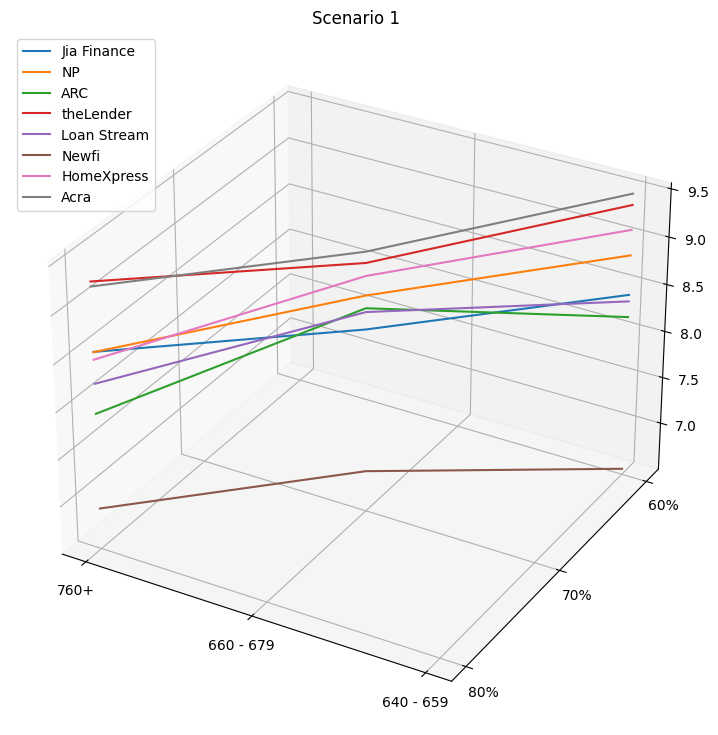

In [ ]:
# Visualization 1
x1 = [result_total1[i][j][0] for j in range(len(result1)) for i in range(len(result_total1))]
y1 = [result_total1[i][j][1] for j in range(len(result1)) for i in range(len(result_total1))]
z1 = [result_total1[i][j][2] for j in range(len(result1)) for i in range(len(result_total1))]

def divide_chunks(l, n):
  for i in range(0, len(l), n):
    yield l[i:i + n]

x1 = list(divide_chunks(x1, 3))
y1 = list(divide_chunks(y1, 3))
z1 = list(divide_chunks(z1, 3))

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection ='3d')


# plotting
for i in range(len(x1)):
  ax.plot3D(range(len(x1[i])), range(len(y1[i])), z1[i])
  ax.set(xticks=range(len(x1[i])), xticklabels=x1[i],
       yticks=range(len(y1[i])), yticklabels=y1[i])
ax.set_title('Scenario 1')
plt.legend(['Jia Finance', 'NP', 'ARC', 'theLender', 'Loan Stream', 'Newfi', 'HomeXpress', 'Acra'])
plt.show()

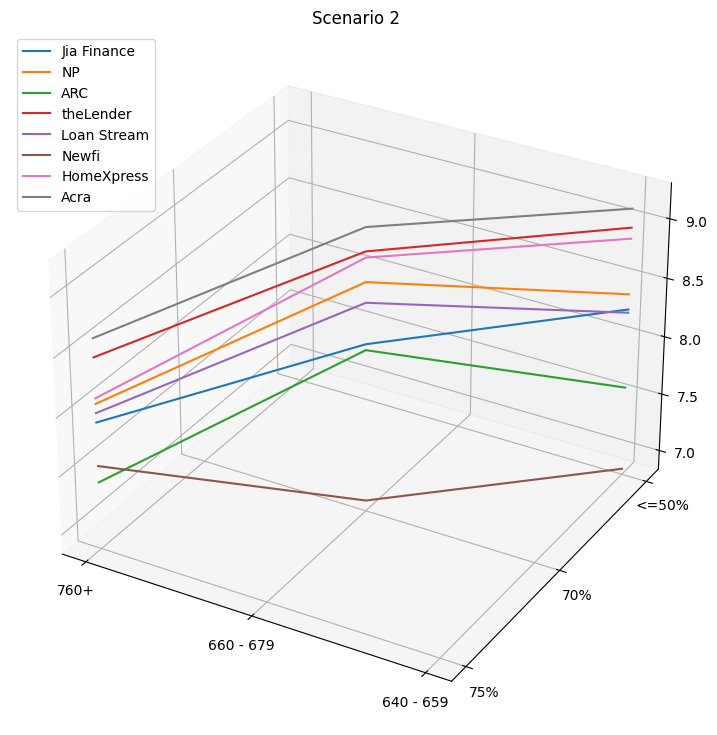

In [ ]:
# Scenario 6
result1 = comparison_for_visualization('30 YR FIX', '760+', '75%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress1, result_Acra1 = comparison_for_visualization2(760, '75%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result1.append(result_HomeXpress1)
result1.append(result_Acra1)

# Scenario 8
result2 = comparison_for_visualization('30 YR FIX', '660 - 679', '70%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress2, result_Acra2 = comparison_for_visualization2(660, '70%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result2.append(result_HomeXpress2)
result2.append(result_Acra2)

# Scenario 10
result3 = comparison_for_visualization('30 YR FIX', '640 - 659', '<=50%', 1.00, 350000, 'SFR', 'Purchase', 'N', '36 Months PPP')
result_HomeXpress3, result_Acra3 = comparison_for_visualization2(640, '<=50%', 1.00, 'SFR', 'Purchase', 'N', '36 Months PPP')
result3.append(result_HomeXpress3)
result3.append(result_Acra3)

# Total
result_total1 = []
result_total1.append(result1)
result_total1.append(result2)
result_total1.append(result3)

# Visualization 2
x1 = [result_total1[i][j][0] for j in range(len(result1)) for i in range(len(result_total1))]
y1 = [result_total1[i][j][1] for j in range(len(result1)) for i in range(len(result_total1))]
z1 = [result_total1[i][j][2] for j in range(len(result1)) for i in range(len(result_total1))]

def divide_chunks(l, n):
  for i in range(0, len(l), n):
    yield l[i:i + n]

x1 = list(divide_chunks(x1, 3))
y1 = list(divide_chunks(y1, 3))
z1 = list(divide_chunks(z1, 3))

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection ='3d')


# plotting
for i in range(len(x1)):
  ax.plot3D(range(len(x1[i])), range(len(y1[i])), z1[i])
  ax.set(xticks=range(len(x1[i])), xticklabels=x1[i],
       yticks=range(len(y1[i])), yticklabels=y1[i])
ax.set_title('Scenario 2')
plt.legend(['Jia Finance', 'NP', 'ARC', 'theLender', 'Loan Stream', 'Newfi', 'HomeXpress', 'Acra'])
plt.show()

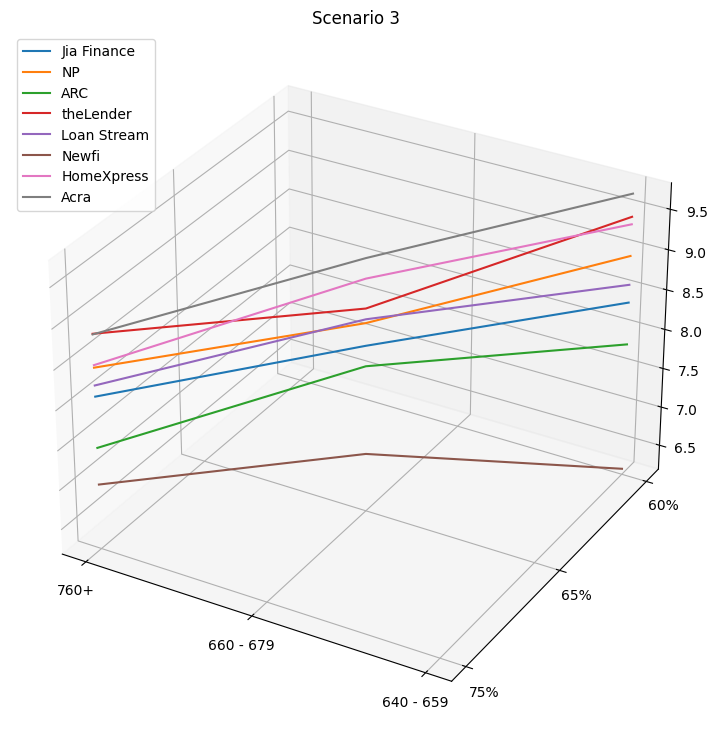

In [ ]:
# Scenario 11
result1 = comparison_for_visualization('30 YR FIX', '760+', '75%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result_HomeXpress1, result_Acra1 = comparison_for_visualization2(760, '75%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result1.append(result_HomeXpress1)
result1.append(result_Acra1)

# Scenario 13
result2 = comparison_for_visualization('30 YR FIX', '660 - 679', '65%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result_HomeXpress2, result_Acra2 = comparison_for_visualization2(660, '65%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result2.append(result_HomeXpress2)
result2.append(result_Acra2)

# Scenario 15
result3 = comparison_for_visualization('30 YR FIX', '640 - 659', '60%', 1.00, 350000, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result_HomeXpress3, result_Acra3 = comparison_for_visualization2(640, '60%', 1.00, 'SFR', 'Cash-Out Refinance', 'N', '36 Months PPP')
result3.append(result_HomeXpress3)
result3.append(result_Acra3)

# Total
result_total1 = []
result_total1.append(result1)
result_total1.append(result2)
result_total1.append(result3)

# Visualization 3
x1 = [result_total1[i][j][0] for j in range(len(result1)) for i in range(len(result_total1))]
y1 = [result_total1[i][j][1] for j in range(len(result1)) for i in range(len(result_total1))]
z1 = [result_total1[i][j][2] for j in range(len(result1)) for i in range(len(result_total1))]

def divide_chunks(l, n):
  for i in range(0, len(l), n):
    yield l[i:i + n]

x1 = list(divide_chunks(x1, 3))
y1 = list(divide_chunks(y1, 3))
z1 = list(divide_chunks(z1, 3))

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection ='3d')


# plotting
for i in range(len(x1)):
  ax.plot3D(range(len(x1[i])), range(len(y1[i])), z1[i])
  ax.set(xticks=range(len(x1[i])), xticklabels=x1[i],
       yticks=range(len(y1[i])), yticklabels=y1[i])
ax.set_title('Scenario 3')
plt.legend(['Jia Finance', 'NP', 'ARC', 'theLender', 'Loan Stream', 'Newfi', 'HomeXpress', 'Acra'])
plt.show()

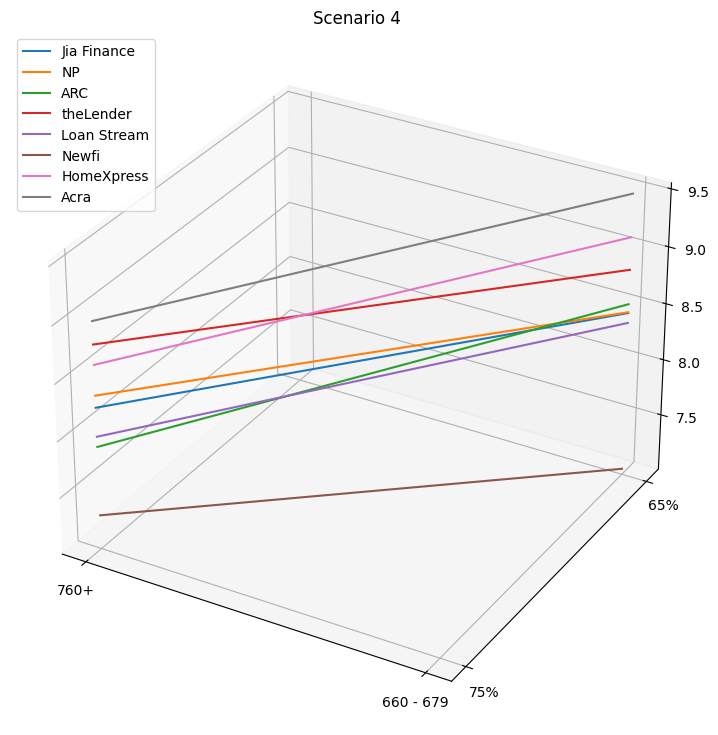

In [ ]:
# Scenario 16
result1 = comparison_for_visualization('30 YR FIX', '760+', '75%', 1.00, 200000, 'SFR', 'Purchase', 'Y', '36 Months PPP')
result_HomeXpress1, result_Acra1 = comparison_for_visualization2(760, '75%', 1.00, 'SFR', 'Purchase', 'Y', '36 Months PPP')
result1.append(result_HomeXpress1)
result1.append(result_Acra1)

# Scenario 17
result2 = comparison_for_visualization('30 YR FIX', '660 - 679', '65%', 1.00, 200000, 'SFR', 'Purchase', 'Y', '36 Months PPP')
result_HomeXpress2, result_Acra2 = comparison_for_visualization2(660, '65%', 1.00, 'SFR', 'Purchase', 'Y', '36 Months PPP')
result2.append(result_HomeXpress2)
result2.append(result_Acra2)

# Total
result_total1 = []
result_total1.append(result1)
result_total1.append(result2)

# Visualization 4
x1 = [result_total1[i][j][0] for j in range(len(result1)) for i in range(len(result_total1))]
y1 = [result_total1[i][j][1] for j in range(len(result1)) for i in range(len(result_total1))]
z1 = [result_total1[i][j][2] for j in range(len(result1)) for i in range(len(result_total1))]

def divide_chunks(l, n):
  for i in range(0, len(l), n):
    yield l[i:i + n]

x1 = list(divide_chunks(x1, 2))
y1 = list(divide_chunks(y1, 2))
z1 = list(divide_chunks(z1, 2))

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection ='3d')


# plotting
for i in range(len(x1)):
  ax.plot3D(range(len(x1[i])), range(len(y1[i])), z1[i])
  ax.set(xticks=range(len(x1[i])), xticklabels=x1[i],
       yticks=range(len(y1[i])), yticklabels=y1[i])
ax.set_title('Scenario 4')
plt.legend(['Jia Finance', 'NP', 'ARC', 'theLender', 'Loan Stream', 'Newfi', 'HomeXpress', 'Acra'])
plt.show()

## Old code

In [ ]:
# Price comparison

def comparison(Loan_type, FICO, LTV, DSCR, Loan_amount, Property_type, Loan_purpose, IO, PPP):

  ## Step 1: Set standard for jia
  standard = 0

  if(IO == 'Y'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               OC_LLPA(OC_jia, LTV, 'Interest Only'), OC_LLPA(OC_jia, LTV, PPP))


  elif(IO == 'N'):
    standard = final_LLPA(FICO_LLPA(FICO_jia, LTV, FICO), DSCR_LLPA(DSCR_jia, LTV, DSCR),
                               LB_LLPA(LB_jia, LTV, Loan_amount), OC_LLPA(OC_jia, LTV, Property_type), OC_LLPA(OC_jia, LTV, Loan_purpose),
                               0, OC_LLPA(OC_jia, LTV, PPP))


  jia_final_rate = get_final_rate(coupon_table_jia, standard, Loan_type, 3)


  ## Step 2: Provide each LLPA

  ## NP
  NP_final_LLPA = 0
  if(IO == 'Y'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose),
                               OC_LLPA(OC_NP, LTV, 'Interest Only'), 0)


  elif(IO == 'N'):
    NP_final_LLPA = final_LLPA(FICO_LLPA(FICO_NP, LTV, FICO), DSCR_LLPA(DSCR_NP, LTV, DSCR),
                               LB_LLPA(LB_NP, LTV, Loan_amount), OC_LLPA(OC_NP, LTV, Property_type), OC_LLPA(OC_NP, LTV, Loan_purpose), 0, 0)


  ## ARC
  ARC_final_LLPA = 0
  if(IO == 'Y'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0,
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose),
                               OC_LLPA(OC_ARC, LTV, 'Interest Only'), 0)



  elif(IO == 'N'):
    ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), 0, 0, 0)
    if(Loan_purpose == 'Purchase'):
      ARC_final_LLPA = final_LLPA(FICO_LLPA(FICO_ARC, LTV, FICO), DSCR_LLPA(DSCR_ARC, LTV, DSCR),
                               LB_LLPA(LB_ARC, LTV, Loan_amount), OC_LLPA(OC_ARC, LTV, Property_type), OC_LLPA(OC_ARC, LTV, Loan_purpose), 0, 0)


  ## theLender
  theLender_final_LLPA = 0
  if(IO == 'Y'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO == ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))

      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))
    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, OC_LLPA(OC_theLender, LTV, 'Interest Only'), OC_LLPA(OC_theLender, LTV, PPP))
  elif(IO == 'N'):
    if(Loan_purpose == 'Cash-Out Refinance'):
      if(FICO == ['760+', '740-759', '720-739', '700-719']):
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO>=700'), 0, OC_LLPA(OC_theLender, LTV, PPP))
      else:
        theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), OC_LLPA(OC_theLender, LTV, 'Cash-Out Refinance & FICO<700'), 0, OC_LLPA(OC_theLender, LTV, PPP))
    else:
      theLender_final_LLPA = final_LLPA(FICO_LLPA(FICO_theLender, LTV, FICO), DSCR_LLPA(DSCR_theLender, LTV, DSCR),
                               LB_LLPA(LB_theLender, LTV, Loan_amount), OC_LLPA(OC_theLender, LTV, Property_type), 0, 0, OC_LLPA(OC_theLender, LTV, PPP))

  ## Newfi
  Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), DSCR_LLPA(DSCR_Newfi, LTV, DSCR),
                               LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), 0, 0, OC_LLPA(OC_Newfi, LTV, PPP))

  if(Loan_purpose == 'Cash-Out Refinance'):
    if(LTV == ['70%', '75%', '80%', '85%', '90%']):
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), DSCR_LLPA(DSCR_Newfi, LTV, DSCR),
                               LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash-Out Refinance & LTV>70%'),
                               0, OC_LLPA(OC_Newfi, LTV, PPP))
    else:
      Newfi_final_LLPA = final_LLPA(FICO_LLPA(FICO_Newfi, LTV, FICO), DSCR_LLPA(DSCR_Newfi, LTV, DSCR),
                               LB_LLPA(LB_Newfi, LTV, Loan_amount), OC_LLPA(OC_Newfi, LTV, Property_type), OC_LLPA(OC_Newfi, LTV, 'Cash-Out Refinance & LTV<=70%'),
                               0, OC_LLPA(OC_Newfi, LTV, PPP))

  #print(standard, NP_final_LLPA, ARC_final_LLPA, Newfi_final_LLPA, theLender_final_LLPA)

  ## Step 3: Get rate from different business
  NP_final_rate = get_final_rate(coupon_table_NP, NP_final_LLPA, Loan_type, 2)
  ARC_final_rate = get_final_rate(coupon_table_ARC, ARC_final_LLPA, Loan_type, 3)
  Newfi_final_rate = get_final_rate(coupon_table_Newfi, Newfi_final_LLPA, Loan_type, 2)
  theLender_final_rate = get_final_rate(coupon_table_theLender, theLender_final_LLPA, Loan_type, 3)

  rate_comparison = {'Jia Finance': jia_final_rate, 'NP': NP_final_rate, 'ARC': ARC_final_rate, 'Newfi': Newfi_final_rate, 'theLender': theLender_final_rate}


  return rate_comparison

In [ ]:
## Get final rate - approximate

def get_final_rate(coupon_table, standard, Loan_type):
  fp = 100-standard
  final_rate = '>' + str(max(coupon_table['Note Rate']))
  if(fp in coupon_table[Loan_type]):
    return coupon_table['Note Rate'][coupon_table[coupon_table[Loan_type] == fp].index[0]]
  else:
    for i in range(len(coupon_table[Loan_type])):
      if(coupon_table[Loan_type][i] >= fp):
        final_rate = coupon_table['Note Rate'][coupon_table[coupon_table[Loan_type] == coupon_table[Loan_type][i]].index[0]]
        break
    return final_rate